D:\anaconda\lib\site-packages\ipykernel_launcher.py:54: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_model5.m
MSE: 0.1614


D:\anaconda\lib\site-packages\ipykernel_launcher.py:75: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


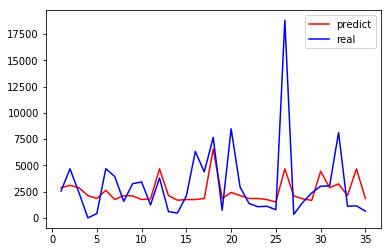

In [9]:
from sklearn import ensemble
import os
import pandas as pd
from sklearn.externals import joblib
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import math
mse_arr=[]
def permutate(file,rate):#训练数据 测试数据划分比例
    a = np.loadtxt(file,delimiter=',')
#     a = open(file,'r', encoding='UTF-8')
    list_a = [i for i in a]
    dict_a = {}
    n = a.shape[0]             # n行m列
    m = a.shape[1]
    for i in range(n):
        dict_a[i] = list_a[i]       # 将矩阵逐行存储在字典里
    # 生成n个随机序列存放在字典中，然后将序列排序，排序后的索引放于list[b]中,最终生成列表类似[3,1,2,0,4]
    rand_number = np.random.rand(n)
    dict_rand = {}
    for i in range(n):
        dict_rand[rand_number[i]] = i
    list_rand = sorted(dict_rand.items())
    list_num = [i[1] for i in list_rand]
    list_b = []
    # 按照生成列表依次提取csv相应行的数据，如[2,0,1]，则生成list_b = [dict_a[2],dict_a[0],dict_a[1]]
    for j in range(n):
        q = list_num[j]
        list_b.append(dict_a[q])
    # 将list_b转为矩阵格式
    tmp1 = math.floor(n*rate)
    train = np.zeros((tmp1, m))
    for i in range(0,tmp1):
        train[i, :] = list_b[i]
    test = np.zeros((n-tmp1,m)) 
    for i in range(n-tmp1):
        test[i, :] = list_b[tmp1+i]
    return {'train':train,'test':test,'file_rows':n,'test_rows':n-tmp1}

os.chdir("C:/Users/yufeng/Desktop/python")
b = permutate('pre_r.csv',0.9)
file_rows = b['file_rows']-b['test_rows']
train_rows = math.floor(file_rows*0.9)

np.savetxt('train.csv', b['train'], delimiter = ',')
np.savetxt('test.csv', b['test'], delimiter = ',')
    
for time in range(50):
    os.chdir("C:/Users/yufeng/Desktop/python")
    t = permutate('train.csv',0.98)
    np.savetxt('train_t.csv', t['train'], delimiter = ',')
    df = pd.read_csv('train_t.csv', header=0, encoding='utf-8')
    y_train,x_train = df.ix[0:train_rows,4:5],df.ix[0:train_rows,5:7]
    y_test,x_test = df.ix[train_rows:,4:5],df.ix[train_rows:,5:7]
    params = {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2,
              'learning_rate': 0.01, 'loss': 'ls'}
    gbr = ensemble.GradientBoostingRegressor(**params) 
    gbr.fit(x_train, y_train)
    os.chdir("C:/Users/yufeng/Desktop/python/model")
    joblib.dump(gbr, "train_model"+ str(time) + ".m")
    y_pre = gbr.predict(x_test)
    y_test = np.array(y_test)
    m=[]
    n=[]
    for i,j in enumerate(y_pre):
        m.append(y_pre[i]/(y_test[i][0]+y_pre[i])) 
        n.append(y_test[i][0]/(y_test[i][0]+y_pre[i]))
    mse = mean_squared_error(n,m)
    mse_arr.append(mse)

a = mse_arr.index(min(mse_arr))
os.chdir("C:/Users/yufeng/Desktop/python")
df1 = pd.read_csv('test.csv', header=0, encoding='utf-8')
y_test,x_test = df1.ix[0:,4:5],df1.ix[0:,5:7]
os.chdir("C:/Users/yufeng/Desktop/python/model")
gbr = joblib.load("train_model"+ str(a)+".m")
print("train_model"+ str(a)+".m")
joblib.dump(gbr, "pre_r_model.m")
y_pre1 = gbr.predict(x_test)
# print(np.mat(y_pre1).T)
df1.ix[0:,7:8] = np.mat(y_pre1).T
os.chdir("C:/Users/yufeng/Desktop/python")
df1.to_csv('test_pre_r.csv',index=False)
index=np.arange(1,b['test_rows'],1)
# index=np.arange(1,16,1)
m=[]
n=[]
y_test = np.array(y_test)
for i,j in enumerate(y_pre1):
    m.append(y_pre1[i]/(y_test[i][0]+y_pre1[i])) 
    n.append(y_test[i][0]/(y_test[i][0]+y_pre1[i]))
mse = mean_squared_error(n,m)
print("MSE: %.4f" % mse)
plt.plot(index,y_pre1,'r-',label='predict')
plt.plot(index,y_test,'b-',label='real')
plt.legend(loc='upper right')
plt.show()
